## "APPLE STOCK MARKET PRICE PREDICITION FOR THE YEAR 2024"

#### Required Libraries
1. Pandas
2. Numpy
3. yfinance (Yahoo Finance)
4. Scikit Learn
5. Matplotlib

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import date2num 

#### Load historical Dataset
Here we use yfinance library to import Apple Stock data using the code of the company i.e "APPL", here we have imported the data from the period of 2020-2023 period.

In [2]:
# Load historical data from Yahoo Finance
symbol = "AAPL"
start_date = "2008-01-01"
end_date = "2023-12-31"

data = yf.download(symbol, start=start_date, end=end_date)
data

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2008-01-01 -> 2023-12-31)')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


### Plot for Closing Price over the specified time

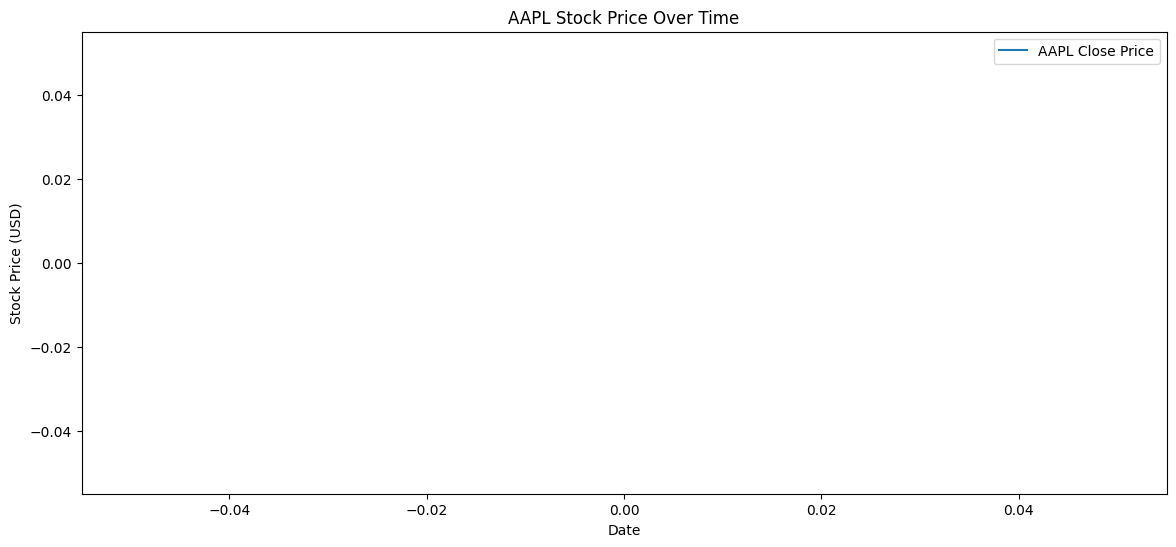

In [3]:
# Plot the closing price over time
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='AAPL Close Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [4]:
# Ensure that the 'Date' column is of datetime type
data['Date'] = pd.to_datetime(data.index)
data['Date']

Series([], Name: Date, dtype: datetime64[ns])

#### Data Processing
Data preprocessing is a crucial step in any data analysis or machine learning project. Its purpose is to clean, transform, and organize raw data into a format suitable for analysis or modeling.

In [5]:
# Create features for analysis (you can add more features if needed)
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Weekday'] = data['Date'].dt.weekday

### Training Dataset
The training dataset consists of features derived from Apple stock's historical closing prices, including date-related information like day, month, year, and weekday, used to train a Linear Regression model for predicting stock prices.

In [6]:
# Split data into training and testing sets
X = data[['Day', 'Month', 'Year', 'Weekday']]
X

,Day,Month,Year,Weekday
Date,,,,


In [7]:
y = data['Close']
y

Series([], Name: Close, dtype: float64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

#### Linear Regression
 Linear Regression model is trained on the historical Apple stock data using the features such as day, month, year, and weekday. The model learns the linear relationship between these features and the closing stock prices during the training process. The trained model is then used for predicting future stock prices.

In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Prediction for the year 2024.
The trained Linear Regression model predicts the Apple stock price on January 1, 2024, based on the provided date-related features, yielding a projected value of predicted_price.

In [ ]:
# Make predictions for 2024
prediction_data = pd.DataFrame({
    'Day': [1],
    'Month': [1],
    'Year': [2024],
    'Weekday': [0]  # Assuming Monday for simplicity
})
prediction_data

,Day,Month,Year,Weekday
0,1,1,2024,0


In [ ]:
predicted_price = model.predict(prediction_data)[0]
f"Predicted Apple stock price on January 1, 2024: ${predicted_price:.2f}"

'Predicted Apple stock price on January 1, 2024: $185.78'

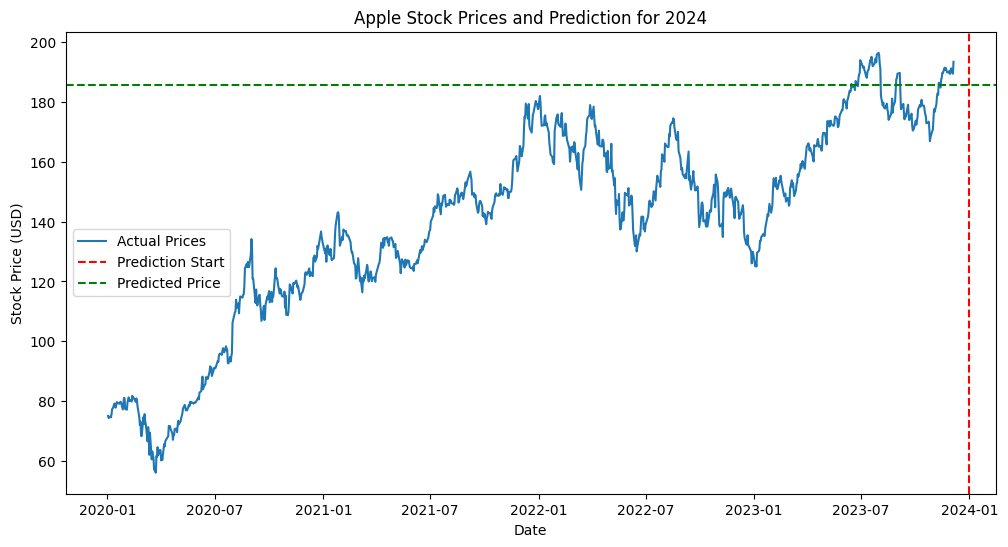

In [ ]:
# Step 6: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.axvline(x=date2num(pd.to_datetime('2024-01-01')), color='r', linestyle='--', label='Prediction Start')
plt.axhline(y=predicted_price, color='g', linestyle='--', label='Predicted Price')
plt.title('Apple Stock Prices and Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()